#Heart Failure Prediction

Dataset Link: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

CSE422 : Artificial Intelligence

Lab Sec: 10

Group  : 9

* Name: Al Rafi Ahmed - 21101092
* Name: Faiaz Ibnee Rahman - 21101151
* Name: Nahiyan Rahman Talukder - 21101273
* Name: Tahseen Chowdhury - 21101217


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Importing and Exploring the dataset:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv")
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


###### Notes for categorical data:


---


Anaemia : 0 means that the person does not have anaemia, if 1 it does.

Diabetes : 0 means that the person does not have diabetes, if 1 it does.

High_blood_pressure : 0 means that the person does not have high_blood_pressure, if 1 it does.

Smoking : 0 means that the person does not smoke, if 1 it smokes.

Sex : 0 for female, 1 for male.

DEATH_EVENT : 0 means heart failure is not the cause of the death, if 1 it is.




In [5]:
#Finding out total rows and columns
data.shape

(299, 13)

###### Note: We have 299 lines and 13 columns

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
#We have splitted our dataset into two categories to make it easier for analysis

discrete_feature = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_feature = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

In [11]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


###### Note:
Since our result is DEATH_EVENT, we grouped our dataset by DEATH_EVENT and we can deduce that our dataset is unbalanced,
because we have the total deaths(96) is less than half of the total persons that did not die because of heart failure (203).

### Data Visualization

<Figure size 1000x1000 with 0 Axes>

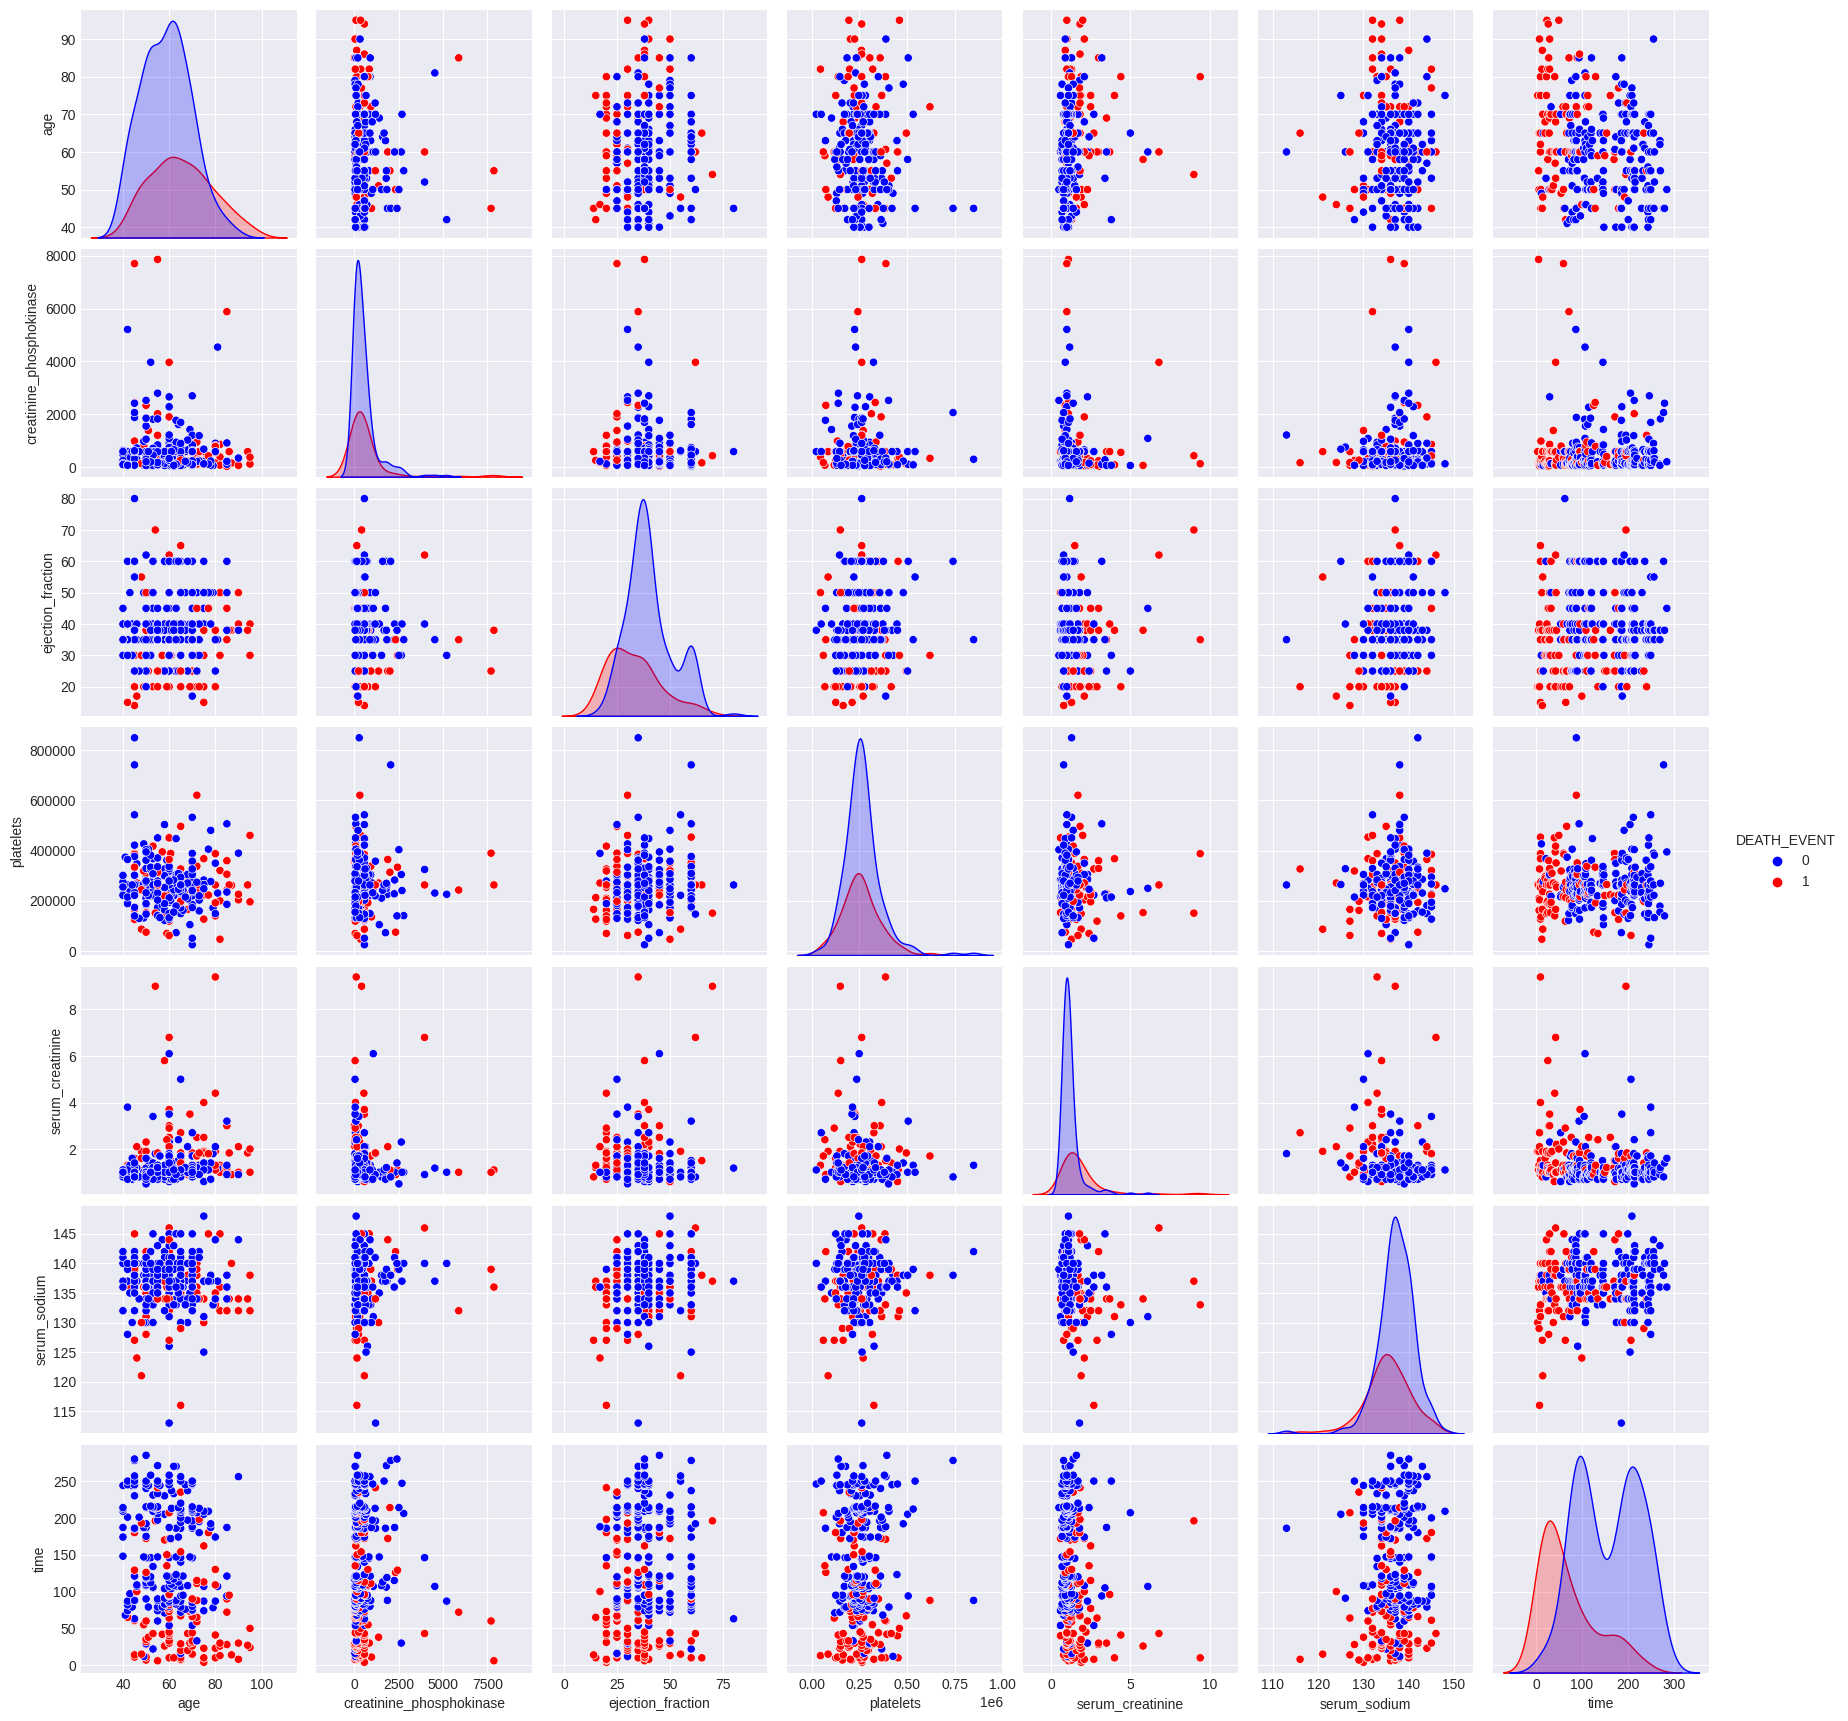

In [12]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-v0_8-darkgrid')

sns.pairplot(data, palette = ["b","r"], hue = 'DEATH_EVENT',
             vars = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])
plt.show()

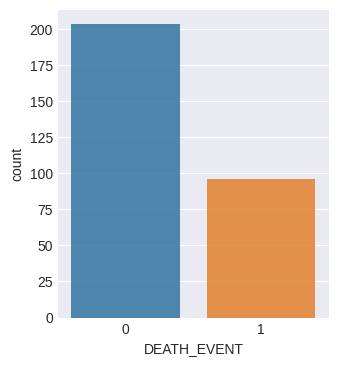

In [13]:
plt.figure(1 , figsize = (14 , 10))

plt.subplot(2 , 3 , 1)
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
sns.countplot(x = 'DEATH_EVENT' , data = data , alpha = 0.85)

plt.show()

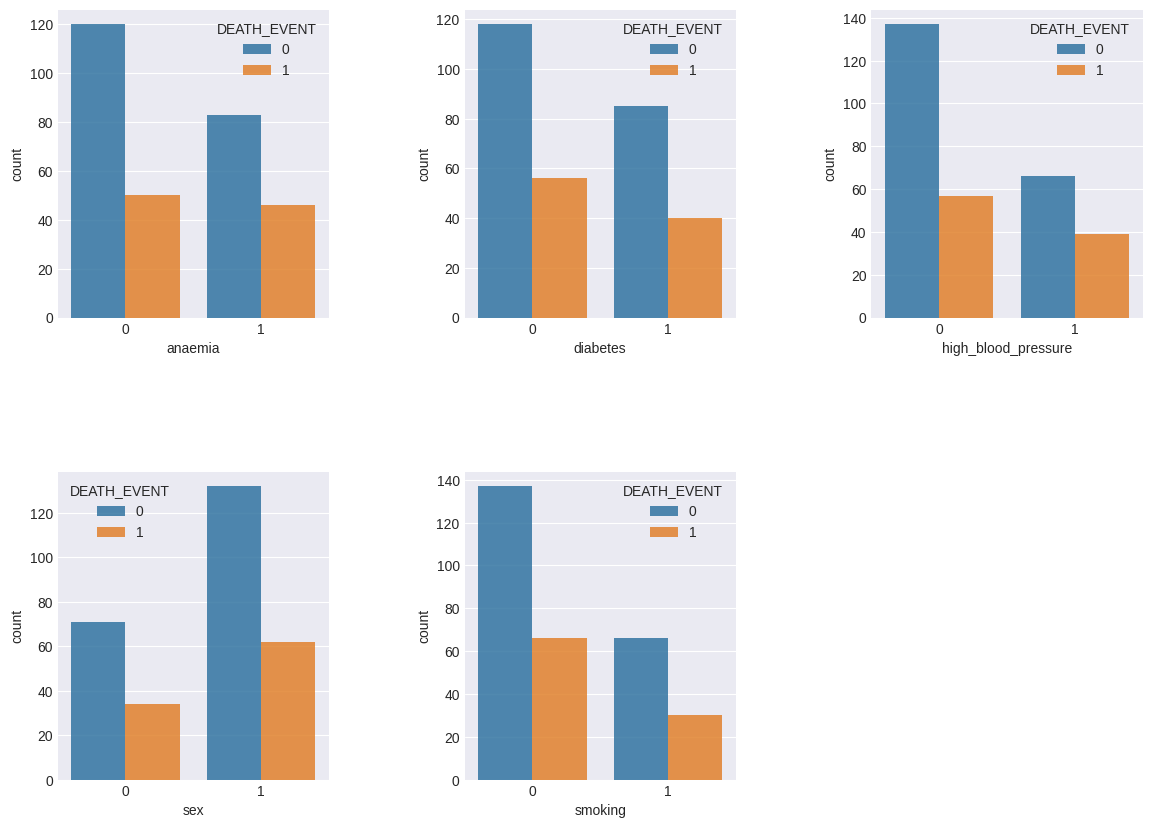

In [14]:
plt.figure(1 , figsize = (14 , 10))

n = 0
for f in discrete_feature:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , hue = 'DEATH_EVENT' , data = data , alpha = 0.85)

plt.show()

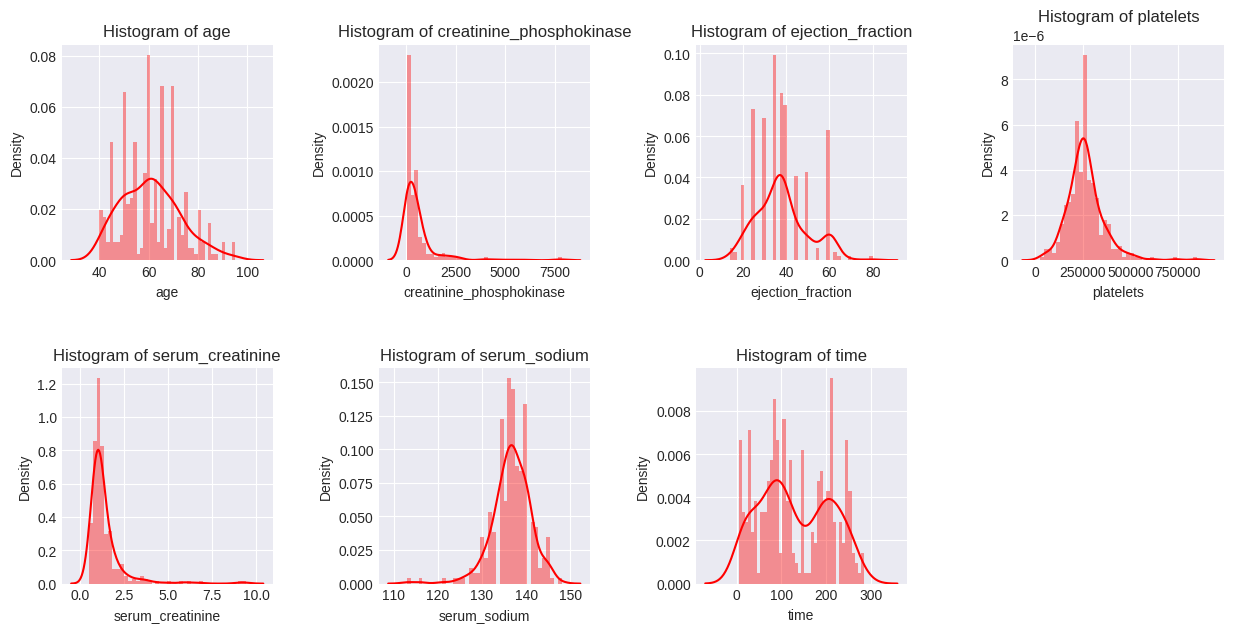

In [15]:
plt.figure(1 , figsize = (15 , 7))

n = 0
for i in continuous_feature:
    n += 1
    plt.subplot(2,4,n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[i] , bins = 40 , color = 'red')
    plt.title(f'Histogram of {i}')

plt.show()

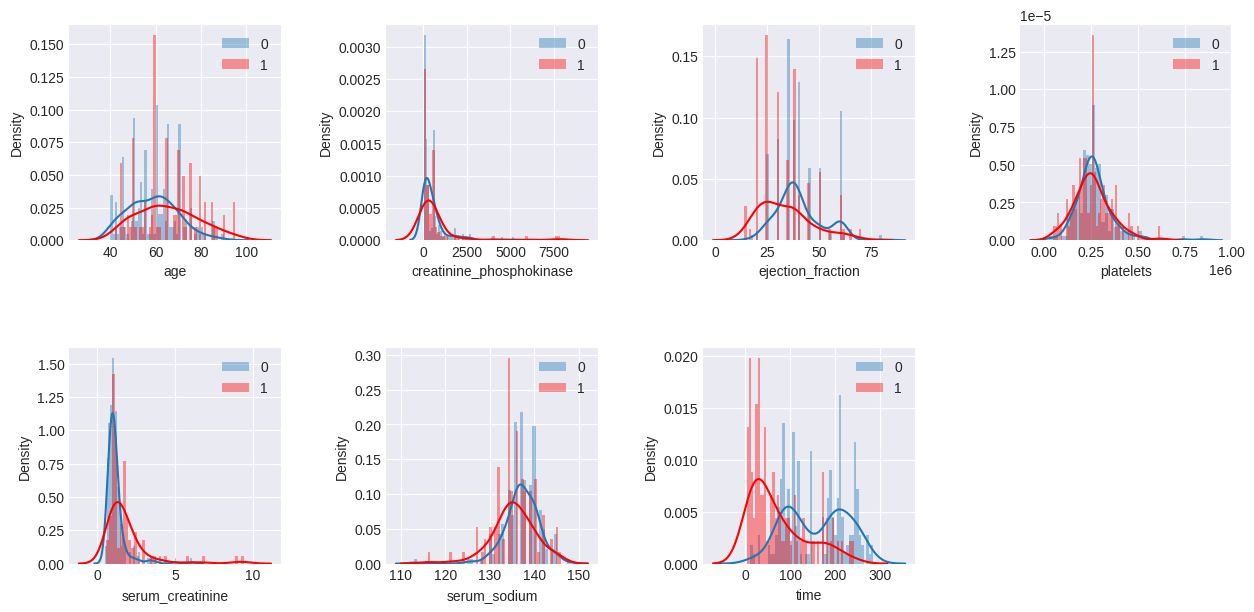

In [16]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for i in continuous_feature:
    n += 1
    plt.subplot(2 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[i][data['DEATH_EVENT'] == 0] , bins = 50 , label = '0')
    sns.distplot(data[i][data['DEATH_EVENT'] == 1] , bins = 50 , color = 'red' , label = '1')
    plt.legend()

plt.show()

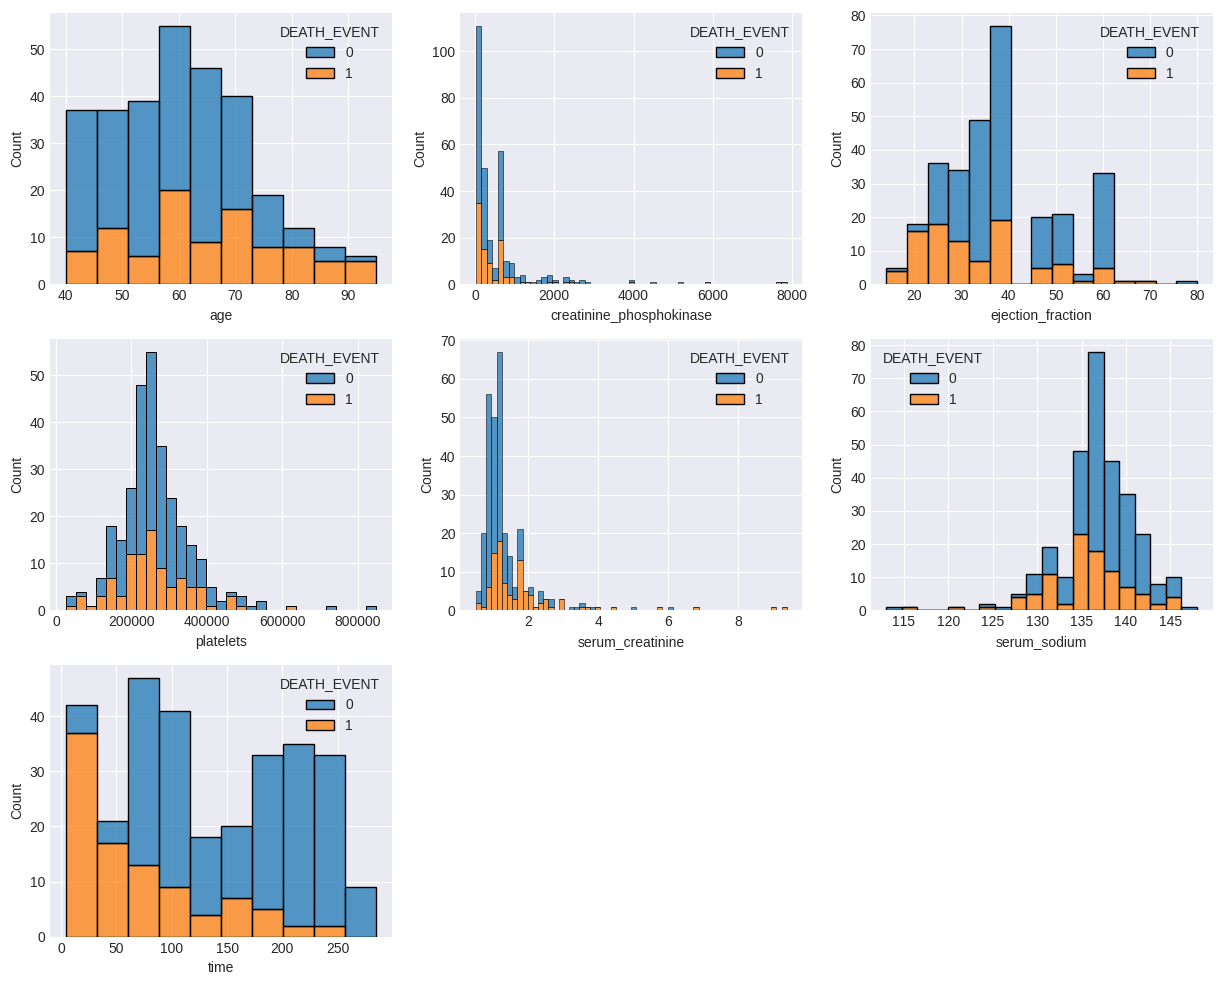

In [17]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(15,12))
for j,con in enumerate(continuous_feature):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

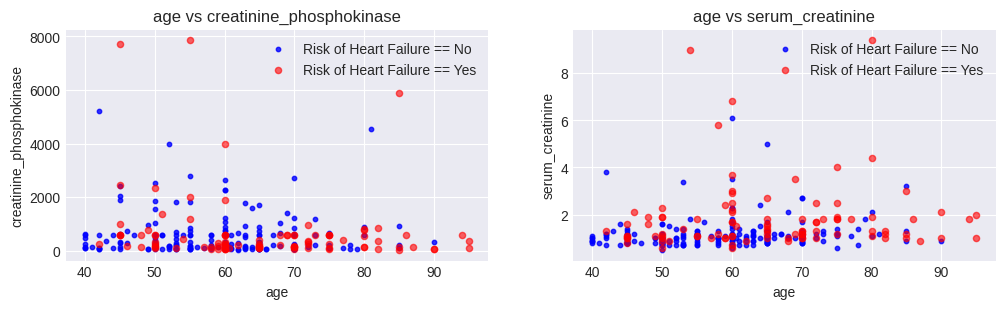

In [18]:
plt.figure(1 , figsize = (12 ,3))

plt.subplot(1 , 2 , 1)
plt.scatter(x = 'age' , y = 'creatinine_phosphokinase' , label = 'Risk of Heart Failure == No',
            data = data[data['DEATH_EVENT'] == 0] ,s = 10,color = 'blue', alpha = 0.8)
plt.scatter(x = 'age' , y = 'creatinine_phosphokinase' , label = 'Risk of Heart Failure == Yes',
            data = data[data['DEATH_EVENT'] == 1] ,s = 20,color = 'red', alpha = 0.6)
plt.title('age vs creatinine_phosphokinase')
plt.xlabel('age')
plt.ylabel('creatinine_phosphokinase')
plt.legend()

plt.subplot(1 , 2 , 2)
plt.scatter(x = 'age' , y = 'serum_creatinine', label = 'Risk of Heart Failure == No',
            data = data[data['DEATH_EVENT'] == 0] ,s = 10, color = 'blue', alpha = 0.8)
plt.scatter(x = 'age' , y = 'serum_creatinine', label = 'Risk of Heart Failure == Yes',
            data = data[data['DEATH_EVENT'] == 1] ,s = 20, color = 'red', alpha = 0.6)
plt.title('age vs serum_creatinine')
plt.xlabel('age')
plt.ylabel('serum_creatinine')
plt.legend()

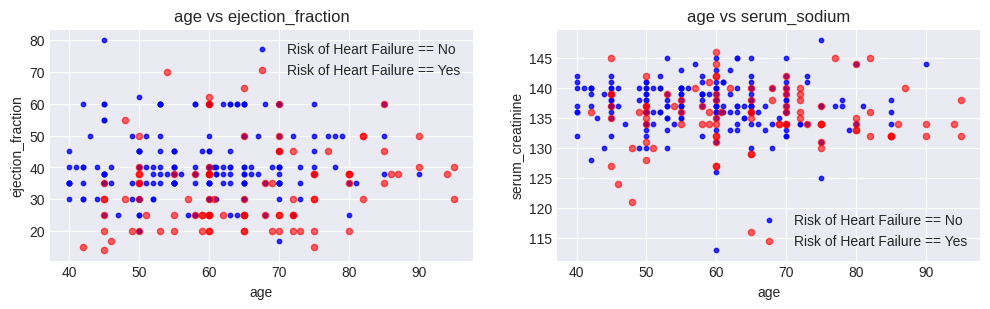

In [19]:
plt.figure(1 , figsize = (12 ,3))

plt.subplot(1 , 2 , 1)
plt.scatter(x = 'age' , y = 'ejection_fraction' , label = 'Risk of Heart Failure == No',
            data = data[data['DEATH_EVENT'] == 0] ,s = 10,color = 'blue', alpha = 0.8)
plt.scatter(x = 'age' , y = 'ejection_fraction' , label = 'Risk of Heart Failure == Yes',
            data = data[data['DEATH_EVENT'] == 1] ,s = 20,color = 'red', alpha = 0.6)
plt.title('age vs ejection_fraction')
plt.xlabel('age')
plt.ylabel('ejection_fraction')
plt.legend()

plt.subplot(1 , 2 , 2)
plt.scatter(x = 'age' , y = 'serum_sodium' , label = 'Risk of Heart Failure == No',
            data = data[data['DEATH_EVENT'] == 0] ,s = 10, color = 'blue', alpha = 0.8)
plt.scatter(x = 'age' , y = 'serum_sodium', label = 'Risk of Heart Failure == Yes',
            data = data[data['DEATH_EVENT'] == 1] ,s = 20, color = 'red', alpha = 0.6)
plt.title('age vs serum_sodium')
plt.xlabel('age')
plt.ylabel('serum_creatinine')
plt.legend()

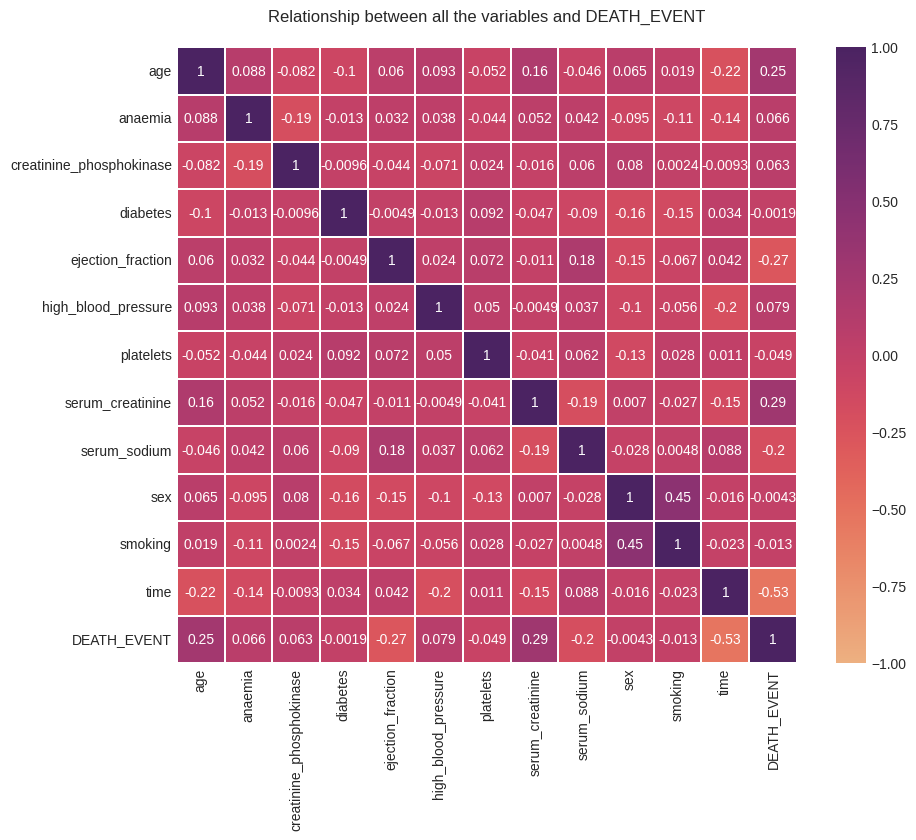

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, fmt='.2g', linewidths=0.009, linecolor='white',
            cmap= 'flare', annot=True)
plt.title("Relationship between all the variables and DEATH_EVENT\n", fontsize = 12)
plt.show()

### Data modeling & prediction using continuous data:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

In [22]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]#drop(columns="DEATH_EVENT",axis=1)#
y = data["DEATH_EVENT"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [24]:
#Data_scaling
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
accuracy_list = [] # A list to save all the values from different models accuracy for comparaison using a bar chart

### 3.1 Logistic Regression

LR Accuracy Score: 0.8777777777777778
LR precision     : 0.782608695652174
LR recall        : 0.75
LR f1 score      : 0.7659574468085107


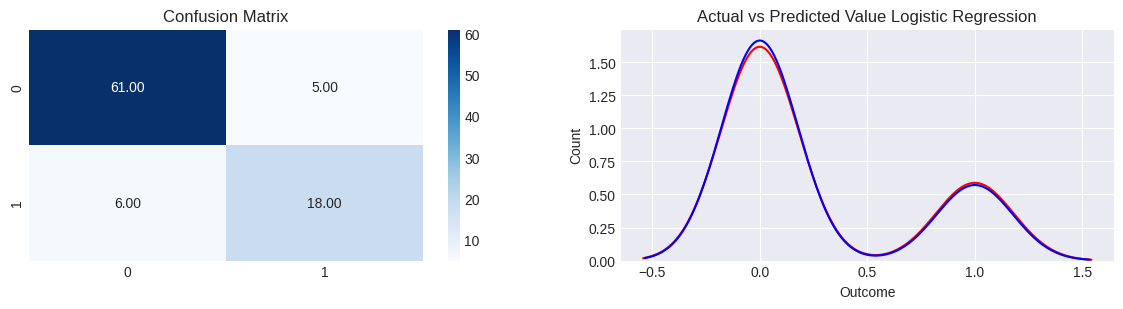

In [26]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
print(f'LR Accuracy Score: {(accuracy_score(y_test,lr_prediction))}')
print(f'LR precision     : {(precision_score(y_test,lr_prediction))}')
print(f'LR recall        : {(recall_score(y_test,lr_prediction))}')
print(f'LR f1 score      : {(f1_score(y_test,lr_prediction))}')
lr_accuracy = (round(accuracy_score(y_test,lr_prediction), 4) * 100) #percentag
accuracy_list.append(lr_accuracy)

cf_matrix = confusion_matrix(y_test,lr_prediction)
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
#plt.xlabel('True Labels')
#plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')

plt.subplot(1,2,2)
sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(lr_prediction, color='b', label='Predicted Value',hist=False)
plt.title(f'Actual vs Predicted Value Logistic Regression')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### 3.2 Support Vector Machine

SVC Accuracy Score: 0.8444444444444444
SVC precision     : 0.6923076923076923
SVC recall        : 0.75
SVC f1 score      : 0.7199999999999999


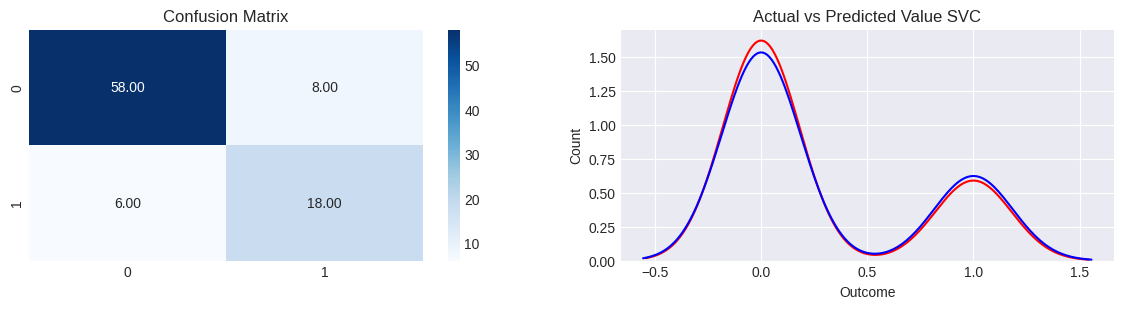

In [27]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
print(f'SVC Accuracy Score: {(accuracy_score(y_test, svc_prediction))}')
print(f'SVC precision     : {(precision_score(y_test, svc_prediction))}')
print(f'SVC recall        : {(recall_score(y_test, svc_prediction))}')
print(f'SVC f1 score      : {(f1_score(y_test,svc_prediction))}')
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)

cf_matrix = confusion_matrix(y_test,svc_prediction)
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.title('Confusion Matrix')


plt.subplot(1,2,2)
sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(svc_prediction, color='b', label='Predicted Value',hist=False)
plt.title(f'Actual vs Predicted Value SVC')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### 3.3 Decison Tree Classifier

DT Accuracy Score: 0.7888888888888889
DT precision     : 0.5862068965517241
DT recall        : 0.7083333333333334
DT f1 score      : 0.6415094339622641


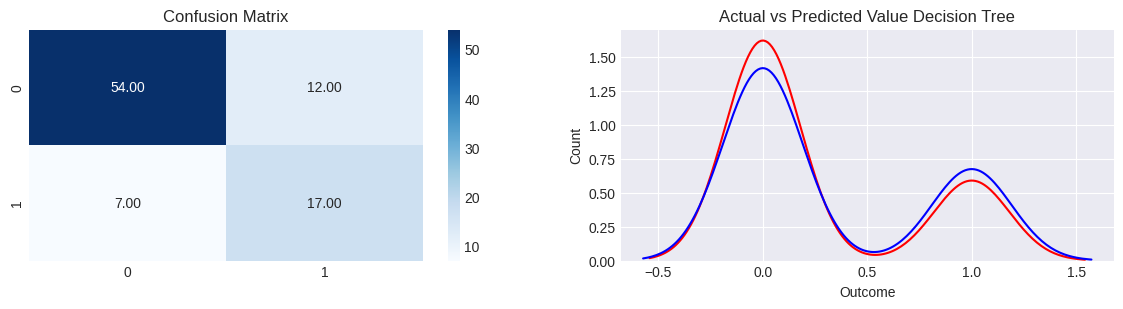

In [28]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
print(f'DT Accuracy Score: {(accuracy_score(y_test, dt_prediction))}')
print(f'DT precision     : {(precision_score(y_test, dt_prediction))}')
print(f'DT recall        : {(recall_score(y_test, dt_prediction))}')
print(f'DT f1 score      : {(f1_score(y_test,dt_prediction))}')
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

cf_matrix = confusion_matrix(y_test,dt_prediction)
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.title('Confusion Matrix')


plt.subplot(1,2,2)
sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(dt_prediction, color='b', label='Predicted Value',hist=False)
plt.title(f'Actual vs Predicted Value Decision Tree')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### 3.4 Naive Bayes

NB Accuracy Score: 0.8222222222222222
NB precision     : 0.75
NB recall        : 0.5
NB f1 score      : 0.6


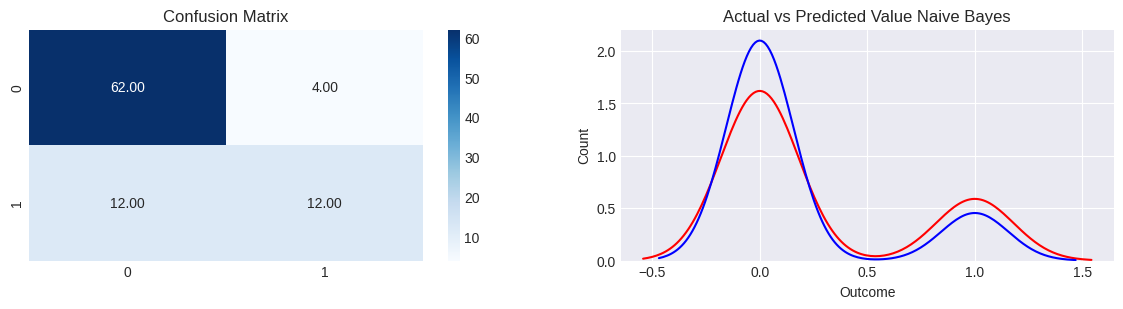

In [29]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
print(f'NB Accuracy Score: {(accuracy_score(y_test, nb_prediction))}')
print(f'NB precision     : {(precision_score(y_test, nb_prediction))}')
print(f'NB recall        : {(recall_score(y_test, nb_prediction))}')
print(f'NB f1 score      : {(f1_score(y_test,nb_prediction))}')
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)

cf_matrix = confusion_matrix(y_test,nb_prediction)
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.title('Confusion Matrix')

plt.subplot(1,2,2)
sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(nb_prediction, color='b', label='Predicted Value',hist=False)
plt.title(f'Actual vs Predicted Value Naive Bayes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### 3.5 Random Forest Classifier

RF Accuracy Score: 0.8777777777777778
RF precision     : 0.782608695652174
RF recall        : 0.75
RF f1 score      : 0.7659574468085107


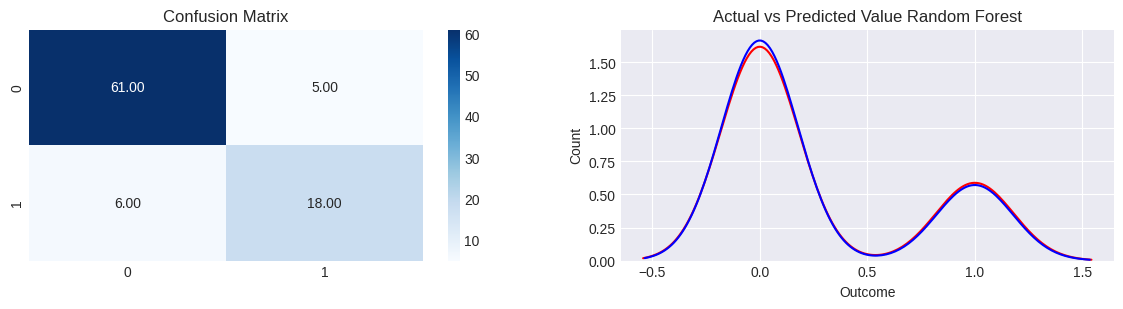

In [30]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
print(f'RF Accuracy Score: {(accuracy_score(y_test, rf_prediction))}')
print(f'RF precision     : {(precision_score(y_test, rf_prediction))}')
print(f'RF recall        : {(recall_score(y_test, rf_prediction))}')
print(f'RF f1 score      : {(f1_score(y_test, rf_prediction))}')
rf_accuracy = (round(accuracy_score(y_test, rf_prediction), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

cf_matrix = confusion_matrix(y_test,rf_prediction)
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.title('Confusion Matrix')


plt.subplot(1,2,2)
sns.distplot(y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(rf_prediction, color='b', label='Predicted Value',hist=False)
plt.title(f'Actual vs Predicted Value Random Forest')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [31]:
accuracy_list

[87.78, 84.44, 78.89, 82.22, 87.78]

In [32]:
models = ["Logistic Regression","SVC","Decision Tree","Naive Bayes","Random Forest"]

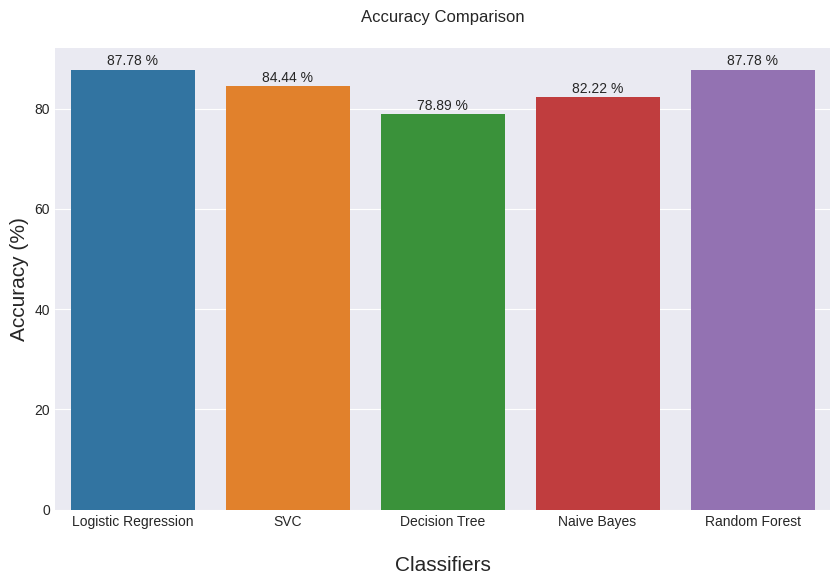

In [33]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("\nClassifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.title("Accuracy Comparison\n")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

In [34]:
#input data as following age, creatinine_phosphokinase, ejection_fraction, serum_creatinine, serum_sodium, time
input_data =  (95,582,20,1.9,80,4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

lr_prediction = lr_model.predict(input_data_reshaped)
if (lr_prediction[0]== 0):
    print('Logistic Regression    : Not Heart Failure')
else:
    print('Logistic Regression    : Heart Failure')

svc_prediction = svc_model.predict(input_data_reshaped)
if (svc_prediction[0]== 0):
    print('Support Vector Machine : Not Heart Failure')
else:
    print('Support Vector Machine : Heart Failure')

dt_prediction = dt_model.predict(input_data_reshaped)
if (dt_prediction[0]== 0):
    print('Decision Tree          : Not Heart Failure')
else:
    print('Decision Tree          : Heart Failure')

nb_prediction = nb_model.predict(input_data_reshaped)
if (nb_prediction[0]== 0):
    print('Naive Bayes            : Not Heart Failure')
else:
    print('Naive Bayes            : Heart Failure')

rf_prediction = rf_model.predict(input_data_reshaped)
if (rf_prediction[0]== 0):
    print('Random Forest          : Not Heart Failure')
else:
    print('Random Forest          : Heart Failure')


Logistic Regression    : Heart Failure
Support Vector Machine : Heart Failure
Decision Tree          : Heart Failure
Naive Bayes            : Heart Failure
Random Forest          : Not Heart Failure
